# Using BioKEEN to Train and Evaluate a KGE Model on ADEPTUS

In [1]:
import json
import logging
import os
import sys
import time
import warnings

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

import biokeen
import pykeen

In [2]:
warnings.filterwarnings('ignore', category=UserWarning)

In [3]:
logging.basicConfig(level=logging.INFO)
logging.getLogger('biokeen').setLevel(logging.INFO)

In [4]:
print(sys.version)

3.7.0 (default, Jul 23 2018, 20:22:55) 
[Clang 9.1.0 (clang-902.0.39.2)]


In [5]:
print(time.asctime())

Sun Jan 20 21:23:06 2019


In [6]:
print(f'PyKEEN Version: {pykeen.constants.VERSION}')
print(f'BioKEEN Version: {biokeen.constants.VERSION}')

PyKEEN Version: 0.0.19-dev
BioKEEN Version: 0.0.12-dev


In [7]:
output_directory = os.path.join(
    os.path.expanduser('~'), 
    'Desktop', 
    'biokeen_test'
)

## Step 1: Configure your experiment

In [8]:
config = dict(
    training_set_path           = [
                                    'bio2bel:adeptus', 
                                    'bio2bel:hsdn',
                                  ],
    execution_mode              = 'Training_mode',  
    kg_embedding_model_name     = 'TransE',
    embedding_dim               = 50, 
    normalization_of_entities   = 2,  # corresponds to L2
    scoring_function            = 1,  # corresponds to L1
    margin_loss                 = 1,
    learning_rate               = 0.01,
    batch_size                  = 128,
    num_epochs                  = 1000,  
    test_set_ratio              = 0.1,
    filter_negative_triples     = True,
    random_seed                 = 2,
    preferred_device            = 'cpu',
)

## Step 2: Run BioKEEN to Train and Evaluate the Model

In [9]:
results = pykeen.run(
    config=config,
    output_directory=output_directory,
)

INFO:pykeen.utilities.pipeline:-------------Train KG Embeddings-------------
Training epoch: 100%|██████████| 1000/1000 [10:19<00:00,  1.61it/s]
INFO:pykeen.utilities.pipeline:-------------Start Evaluation-------------
INFO:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 121.18s seconds


## Step 3: Show Exported Results

### 3.1: Show Trained Model

In [10]:
results.results['trained_model']

TransE(
  (criterion): MarginRankingLoss()
  (entity_embeddings): Embedding(4127, 50)
  (relation_embeddings): Embedding(3, 50)
)

### 3.2: Plot losses

In [11]:
losses = results.results['losses']

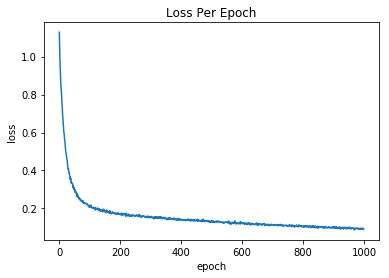

In [12]:
epochs = np.arange(len(losses))
plt.title(r'Loss Per Epoch')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(epochs, losses)
plt.show()

In [13]:
print(json.dumps(results.results['eval_summary'], indent=2))

{
  "mean_rank": 315.866030283081,
  "hits@k": {
    "1": 0.10368663594470046,
    "3": 0.21329822251481237,
    "5": 0.293614219881501,
    "10": 0.4206714944042133
  }
}
